### To Search for the python version simply type `python -V` or `python --version`

To install through cmd (Make sure to check if the python is present in the system path before running this command
`pip install scikit-learn mlxtend`

To install through jupyter notebook
`!pip install scikit-learn mlxtend`

To install through Anaconda Prompt
`conda install scikit-learn mlxtend`

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Linear Regression

Predictions: [2.14085767 2.98299806 2.4221068  2.25138365 4.94249378 1.99184497
 3.63295834 2.08460784 2.35302807 2.72148571 1.98592394 2.92970875
 2.26519939 1.90598997 2.85927651 5.51029291 4.16585143 1.93658199
 2.02835802 4.89549217 2.70927697 2.23954158 2.45861985 6.48540308
 3.27769627 3.2010895  3.00532869 4.53368891 3.43559052 3.37810036
 2.22375215 1.88329268 2.64710611 1.93460831 2.71556468 2.26519939
 2.19019962 3.15507473 3.09389071 2.61750094 2.17835756 2.08658152
 2.79414513 2.2602652  3.51293064 2.74579002 3.7126388  2.39447531
 4.33632109]
Mean Absolute Error: 0.6639412525030272
Mean Squared Error: 0.7992638774763305


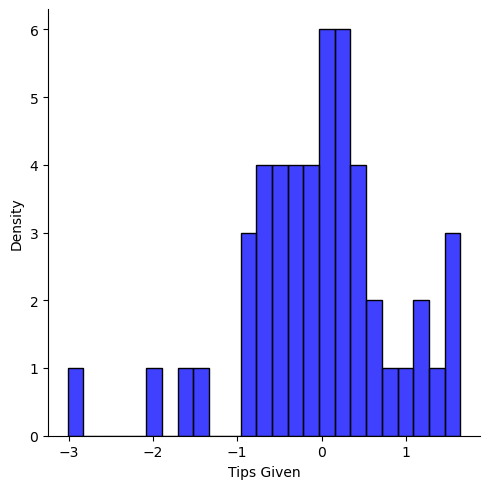

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = sns.load_dataset("tips")

X = df[['total_bill', 'size']]
Y = df['tip']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

lmodel = LinearRegression()
lmodel.fit(x_train, y_train)

predictions = lmodel.predict(x_test)
print("Predictions:", predictions)

print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

sns.displot((y_test - predictions), bins = 25, color = "blue")
plt.xlabel("Tips Given")
plt.ylabel("Density")
plt.show()

# Logistic Regression

Accuracy: 0.9333333333333333
Classification Report: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



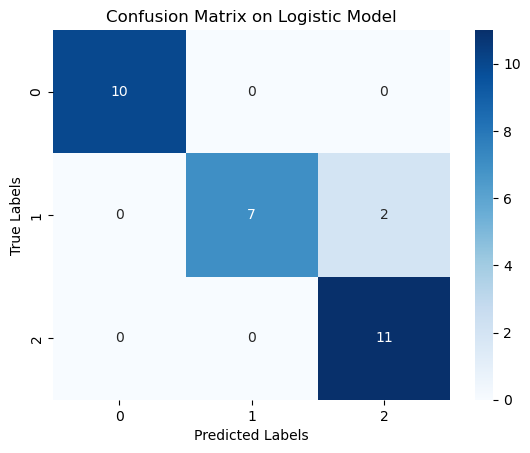

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = sns.load_dataset('iris')

X = df.values[:,:4]
Y = df.values[:,4]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
lgmodel = LogisticRegression(C = 0.01)
lgmodel.fit(x_train, y_train)

predict = lgmodel.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test,predict)}")
print(f"Classification Report: \n{classification_report(y_test,predict)}")
cm = confusion_matrix(y_test,predict)
sns.heatmap(cm, annot = True, cmap = "Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix on Logistic Model")
plt.show()

# Decision Tree Classifier

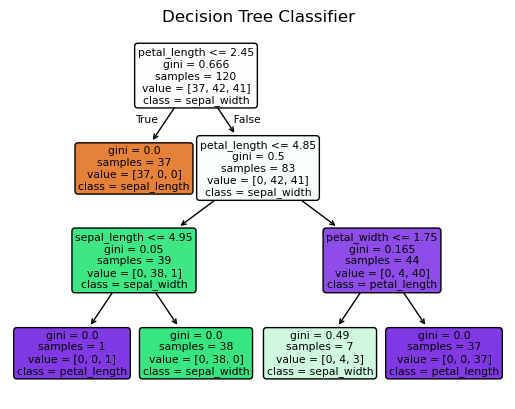

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = sns.load_dataset('iris')
X = df.values[:,:4]
Y = df.values[:,4]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 43)
dtm = DecisionTreeClassifier(max_depth = 3)
dtm.fit(x_train, y_train)

predict = dtm.predict(x_test)

plot_tree(dtm, filled = True, rounded = True, feature_names = list(df.columns[:4]), class_names = list(df.columns[:5]))
plt.title("Decision Tree Classifier")
plt.show()

# Kmeans Clustering

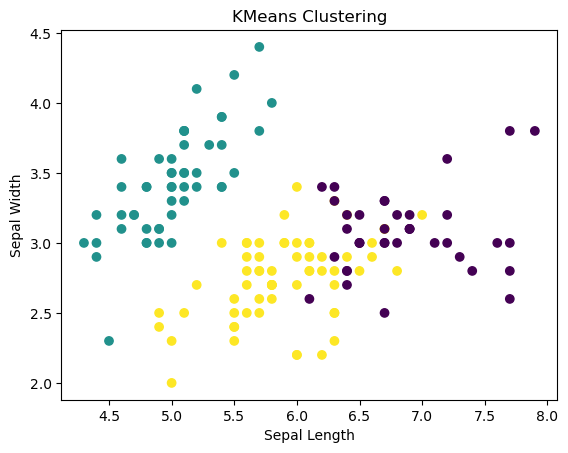

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = sns.load_dataset('iris')
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df.drop('species', axis = 1))
labels = kmeans.labels_
plt.scatter(df['sepal_length'], df['sepal_width'], c = labels)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("KMeans Clustering")
plt.show()

# Perceptron

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = sns.load_dataset('iris')
X = df.values[:,:4]
Y = df.values[:,4]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

      setosa       0.62      1.00      0.77        10
  versicolor       1.00      0.33      0.50         9
   virginica       1.00      1.00      1.00        11

    accuracy                           0.80        30
   macro avg       0.88      0.78      0.76        30
weighted avg       0.88      0.80      0.77        30

Confusion Matrix:
 [[10  0  0]
 [ 6  3  0]
 [ 0  0 11]]


# SVM

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
     accuracy_score,
     precision_score,
     recall_score,
     f1_score,
     confusion_matrix,
     classification_report
)
iris = load_iris()
X, y = iris.data, iris.target

X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.80
Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



# Naive bayes Classifier

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

# Load data and split
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train the classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate the classifier (optional)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Take user input for prediction
# Expecting input as comma separated values for the 4 features
user_input = input("Enter sepal length, sepal width, petal length, and petal width (comma separated): ")
# Convert the input string to a list of floats
features = list(map(float, user_input.split(',')))

# Ensure the input is valid
if len(features) != 4:
    print("Please enter exactly 4 values.")
else:
    features_array = np.array(features).reshape(1, -1)
    prediction = nb.predict(features_array)
    # Map prediction to iris target names
    predicted_class = iris.target_names[prediction[0]]
    print("Predicted class:", predicted_class)

Model Accuracy: 0.9777777777777777


Enter sepal length, sepal width, petal length, and petal width (comma separated):  2,0.5,1,1


Predicted class: versicolor


# Apriori

In [10]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
dataset = [
 ['milk', 'bread', 'butter'],
 ['bread', 'butter'],
 ['milk', 'bread'],
 ['milk', 'bread', 'butter'],
 ['bread', 'butter']
]
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print("\nFrequent Itemsets:")
print(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=
1.0)
print("\nAssociation Rules:")
print(rules)
print("\nNumber of association rules: ",len(rules))


Frequent Itemsets:
   support         itemsets
0      1.0          (bread)
1      0.8         (butter)
2      0.6           (milk)
3      0.8  (butter, bread)
4      0.6    (milk, bread)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0    (butter)     (bread)                 0.8                 1.0      0.8   
1     (bread)    (butter)                 1.0                 0.8      0.8   
2      (milk)     (bread)                 0.6                 1.0      0.6   
3     (bread)      (milk)                 1.0                 0.6      0.6   

   confidence  lift  representativity  leverage  conviction  zhangs_metric  \
0         1.0   1.0               1.0       0.0         inf            0.0   
1         0.8   1.0               1.0       0.0         1.0            0.0   
2         1.0   1.0               1.0       0.0         inf            0.0   
3         0.6   1.0               1.0       0.0         1.0            0.0   

   jaccard

# Voting Classifier

In [11]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = sns.load_dataset("iris")
x = df.values[:,:4]
y = df.values[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Removed the multi_class parameter
log_clf = LogisticRegression(max_iter=200, solver='lbfgs')
tree_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()

# Hard Voting Classifier (majority vote)
hard_voting_clf = VotingClassifier(estimators=[
    ('log_clf', log_clf),
    ('tree_clf', tree_clf),
    ('knn_clf', knn_clf)
], voting='hard')

# Soft Voting Classifier (average probabilities)
soft_voting_clf = VotingClassifier(estimators=[
    ('log_clf', log_clf),
    ('tree_clf', tree_clf),
    ('knn_clf', knn_clf)
], voting='soft')

# Train and evaluate Hard Voting Classifier
hard_voting_clf.fit(X_train, y_train)
y_pred_hard = hard_voting_clf.predict(X_test)
hard_acc = accuracy_score(y_test, y_pred_hard)
print(f"Hard Voting Classifier Accuracy: {hard_acc:.4f}")

# Train and evaluate Soft Voting Classifier
soft_voting_clf.fit(X_train, y_train)
y_pred_soft = soft_voting_clf.predict(X_test)
soft_acc = accuracy_score(y_test, y_pred_soft)
print(f"Soft Voting Classifier Accuracy: {soft_acc:.4f}")

Hard Voting Classifier Accuracy: 1.0000
Soft Voting Classifier Accuracy: 1.0000


# Ramdom Forest Classifier

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']
Accuracy:1.00
Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



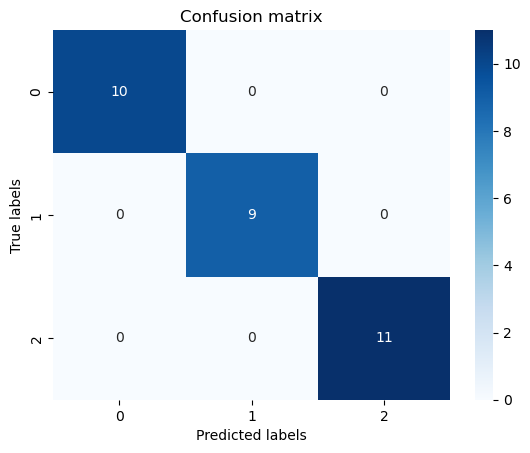

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("iris")
x = df.values[:,:4]
y = df.values[:,4]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
clf=model.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy:.2f}')
print("Classification Report: \n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()